In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from subprocess import call
from IPython.display import Image

In [130]:
data = pd.read_csv('breast-cancer-wisconsin.csv', na_values = '?')
data = data.dropna()
data

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [131]:
#split the data
X = data.iloc[:,1:10]
feature_list = list(X)
y = data.iloc[:,10]
target = list(y)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

In [132]:
#train the model
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
#test the model
y_pred = RFR.predict(X_test)
error = abs(y_pred - y_test)

In [134]:
#calculate Mean Absolute Error
print('Mean Absolute Error:',round(np.mean(error), 2),'degrees .')
#calculate Mean Absolute percentage Error(MAPE)
mape = 100*(error / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2),'%')

Mean Absolute Error: 0.1 degrees .
Accuracy: 96.28 %


In [135]:
#extract single tree
tree = RFR.estimators_[5]
#to visualize the graph need to convert list of features into dot files
export_graphviz(tree,out_file='tree.dot',feature_names = feature_list,class_names = target,rounded = True, proportion = False, precision = 2, filled = True)
#use dot file to create a graph
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [136]:
#display a tree of whole random forest
Image(filename = 'tree.png')

In [137]:
#to have numerical value of feature importance
importances = list(RFR.feature_importances_)
print(importances)

[0.035433332405253995, 0.4607261282470706, 0.21725104204725848, 0.009793319778692038, 0.0294473065033875, 0.18466861765875014, 0.020747335724500462, 0.03415088964373861, 0.0077820279913483085]


In [138]:
# List of tuples with variable and importance which convert to tuples and then to list by zipping values into tuple and then list 
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
#sort the features
feature_importances.sort(key = lambda x: -x[1])

print(feature_importances)

[('F2', 0.46), ('F3', 0.22), ('F6', 0.18), ('F1', 0.04), ('F5', 0.03), ('F8', 0.03), ('F7', 0.02), ('F4', 0.01), ('F9', 0.01)]


In [139]:
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:14} Importance: {}'.format(*pair))
print("Here, Important features are F2 : Uniformity of Cell Size,  F3 : Uniformity of Cell Shape, F6: Bare Nuclei.")

Variable: F2             Importance: 0.46
Variable: F3             Importance: 0.22
Variable: F6             Importance: 0.18
Variable: F1             Importance: 0.04
Variable: F5             Importance: 0.03
Variable: F8             Importance: 0.03
Variable: F7             Importance: 0.02
Variable: F4             Importance: 0.01
Variable: F9             Importance: 0.01
Here, Important features are F2 : Uniformity of Cell Size,  F3 : Uniformity of Cell Shape, F6: Bare Nuclei.


<AxesSubplot:>

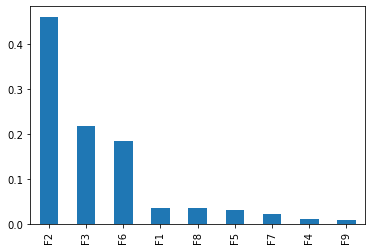

In [140]:
#plot of important feature
feat_importances = pd.Series(RFR.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')